In [1]:
%load_ext autoreload
%autoreload 2
from boundmass import Bound
import numpy as np

In [202]:
import cProfile
import pstats

In [33]:
loc = "/Users/qb20321/Desktop/SWIFTother/neptune/snapOUT_PLANETimpact_0d0h_29d92110_npt630701_59d84220_v36d5067kms_b0d000_pX_neptune_AQUA.hdf5"
#loc = "/Users/qb20321/Desktop/SWIFTother/neptune/snapOUT_PLANETimpact_0d0h_59d82025_npt1237900_89d74135_v77d7296kms_b0d000_pX_neptune_AQUA.hdf5"
#loc = "/Users/qb20321/Desktop/SWIFTother/test_snap/snapOUT_cooling_PlanetIC_0d59982Earth_npt309970_EiEf.hdf5"
loc = "/Users/qb20321/Desktop/SWIFTother/test_snap/snapOUT_PLANETimpact_0d0h_1d58089_npt3153719_3d16179_v36d8300kms_b0d000_pX_EiEf.hdf5"
loc = "/Users/qb20321/Desktop/SWIFTother/test_snap/snapOUT_PLANETimpact_0d0h_1d58085_npt173750_3d16170_v36d8387kms_b0d000_pX_EiEf.hdf5"
#x = Bound(filename=loc, verbose=1,npt=309970,total_mass=0.6)
x = Bound(filename=loc, verbose=1,num_rem=5,minibound=2000)
#x.find_bound()

In [34]:
x.find_bound()

Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
Not enough particles in the bound group
----------break------------
Bad seeds larger than the maximum allowed bad seeds
++++++++++++++++++++++++++++++++++++++++++++++
+ ALL BOUND MASS = 20.42 % total initial mass+
++++++++++++++++++++++++++++++++++++++++++++++


-----------------

In [6]:
x.total_vap_fraction()

21.54 % of core vapourized
62.06 % of mantle vapourized


In [17]:
x.rem_vap_fraction(rem_id=1)

In the remnant 1: 16.08 % of iron vapourized
In the remnant 1: 67.71 % of si vapourized


In [35]:
x.bound

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
x.bound_id

array([1., 2., 3., 4., 0.])

In [40]:
["remnant {:d}".format(int(i)) for i in x.bound_id]

['remnant 1', 'remnant 2', 'remnant 3', 'remnant 4', 'remnant 0']

In [49]:
x.bound_id


array([1., 2., 3., 4., 0.])

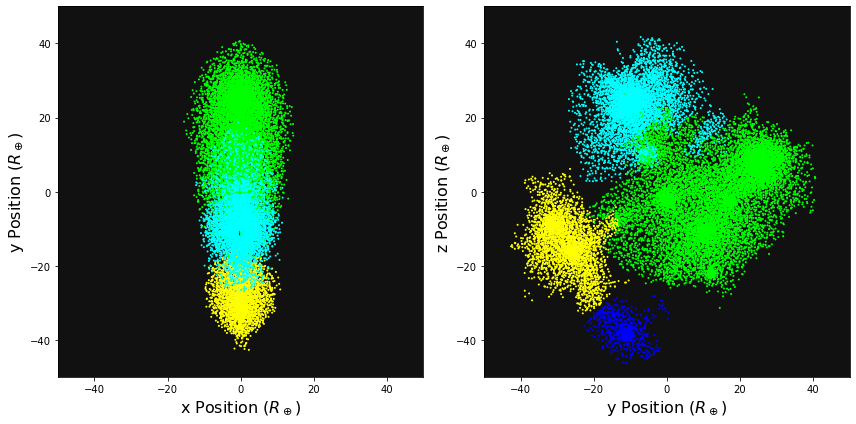

In [55]:
x.basic_plot(mode=0,extent=[-50,50,-50,50,-50,50])

In [20]:
x=np.array([])
x is None

False

In [200]:
x.total_mass

3.16179

In [189]:
x.source_track()

ratio = 50.00 % HM80_HHe is from target
ratio = 50.00 % AQUA is from target
ratio = 50.00 % ANEOS_forsterite is from target


['lime']


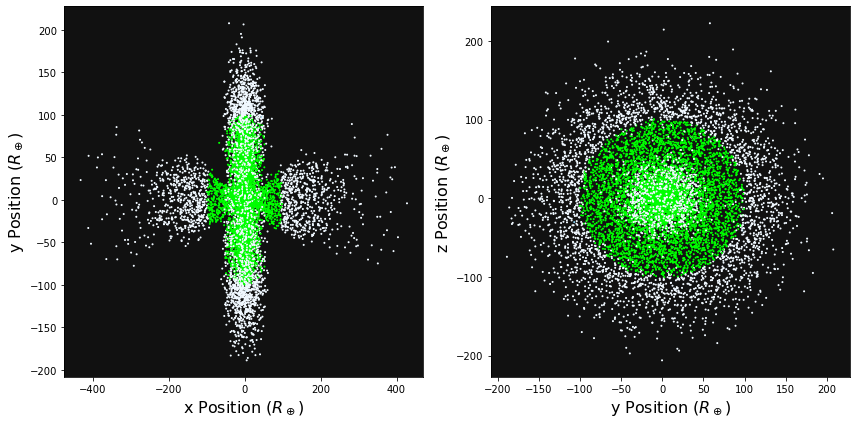

In [194]:
x.static_plot(mode=0)

In [58]:
loc_tar = '/Users/qb20321/Desktop/SWIFTother/test_snap/cooling/snapOUT_cooling_PLANETic_1d5842_npt173750_EXiNf.hdf5'
loc_imp = '/Users/qb20321/Desktop/SWIFTother/test_snap/cooling/snapOUT_cooling_PLANETic_1d5842_npt173750_EXiNf.hdf5'

loc_snap = '/Users/qb20321/Desktop/SWIFTother/test_snap/snapOUT_PLANETimpact_0d0h_1d58085_npt173750_3d16170_v36d8387kms_b0d000_pX_EiEf.hdf5'
x = Bound(loc_snap,verbose=0,num_rem=1,minibound=2000)
d=x.all_in_one(loc_tar=loc_tar,loc_imp=loc_imp)

In [59]:
d

M_tar                          1.580851
M_total                        3.161702
gamma                               1.0
npt                              173750
b                                   0.0
v                               36.8387
hit_dir                              pX
attributes                         EiEf
m_lr                           0.338995
ratio_lr                       0.107219
Z_Fe_lr                        0.765108
np_lr                           37257.0
m_slr                                []
ratio_slr                            []
Z_Fe_slr                             []
np_slr                               []
accretion_rate                -0.785562
Q_R_norm                       1.950501
Q_RD_star_prime     869705827034.674316
Q_R                1696362272112.500488
dtype: object

In [67]:
a = np.array([111,1,12,23,1111,222,3,4,77,9000])
c = np.array([84,82,83,85,84])
b= np.array([9000,1,3,23,1111])
xsort=np.argsort(a)
y = np.searchsorted(a[xsort],b)
a[xsort[y]]=c
a

array([111,  82,  12,  85,  84, 222,  83,   4,  77,  84])

In [71]:
type_factor = 100
Di_mat_type = {
            "idg": 0,
            "Til": 1,
            "HM80": 2,
            "SESAME": 3,
            "ANEOS": 4,
        }

In [21]:
uniq_mat = np.array([400])
np.append(uniq_mat,0)

array([400,   0])

In [35]:
a=uniq_mat[1:2].astype(float)

In [36]:
if a is np.em

array([], dtype=float64)

In [2]:
 303 not in [400,401]

True